<a href="https://colab.research.google.com/github/dinasoffa/Unsubervised_ML/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [ ]:
#read the data

data_path = '/content/countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- change our datatype to "category" and "float"         <br>
2-  handel missing value         <br>
3-  drop columns "not necessary"         <br>

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

# change the name of columns and change the datatype of columns

In [ ]:
df.columns = (["country","region","population","area","density","coastline","migration","infant_mortality",
               "gdp","literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture",
               "industry","service"])

In [ ]:
#solution 


In [ ]:
from pandas.io.formats.info import DataFrameTableBuilderVerbose
#df.country = df.country.astype('category')
#df.region = df.region.astype('category')
df.density = df.density.str.replace(",",".").astype(float)
df.coastline = df.coastline.str.replace(",",".").astype(float)
df.migration = df.migration.str.replace(",",".").astype(float)
df.infant_mortality = df.infant_mortality.str.replace(",",".").astype(float)
df.literacy = df.literacy.str.replace(",",".").astype(float)
df.phones = df.phones.str.replace(",",".").astype(float)
df.arable = df.arable.str.replace(",",".").astype(float)
df.crops = df.crops.str.replace(",",".").astype(float)
df.other = df.other.str.replace(",",".").astype(float)
df.climate = df.climate.str.replace(",",".").astype(float)
df.birthrate = df.birthrate.str.replace(",",".").astype(float)
df.deathrate = df.deathrate.str.replace(",",".").astype(float)
df.agriculture = df.agriculture.str.replace(",",".").astype(float)
df.industry = df.industry.str.replace(",",".").astype(float)
df.service = df.service.str.replace(",",".").astype(float)

In [ ]:
#test 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           227 non-null    object 
 1   region            227 non-null    object 
 2   population        227 non-null    int64  
 3   area              227 non-null    int64  
 4   density           227 non-null    float64
 5   coastline         227 non-null    float64
 6   migration         224 non-null    float64
 7   infant_mortality  224 non-null    float64
 8   gdp               226 non-null    float64
 9   literacy          209 non-null    float64
 10  phones            223 non-null    float64
 11  arable            225 non-null    float64
 12  crops             225 non-null    float64
 13  other             225 non-null    float64
 14  climate           205 non-null    float64
 15  birthrate         224 non-null    float64
 16  deathrate         223 non-null    float64
 1

**Second issue**

# handle massing value

In [ ]:
missing = df.isnull().sum()
missing

country              0
region               0
population           0
area                 0
density              0
coastline            0
migration            3
infant_mortality     3
gdp                  1
literacy            18
phones               4
arable               2
crops                2
other                2
climate             22
birthrate            3
deathrate            4
agriculture         15
industry            16
service             15
dtype: int64

In [ ]:
#solution 


In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
#test 
update=df.isnull().sum()
update


country             0
region              0
population          0
area                0
density             0
coastline           0
migration           0
infant_mortality    0
gdp                 0
literacy            0
phones              0
arable              0
crops               0
other               0
climate             0
birthrate           0
deathrate           0
agriculture         0
industry            0
service             0
dtype: int64

# handle the space in reigon column

In [ ]:
df.region = df.region.str.strip()

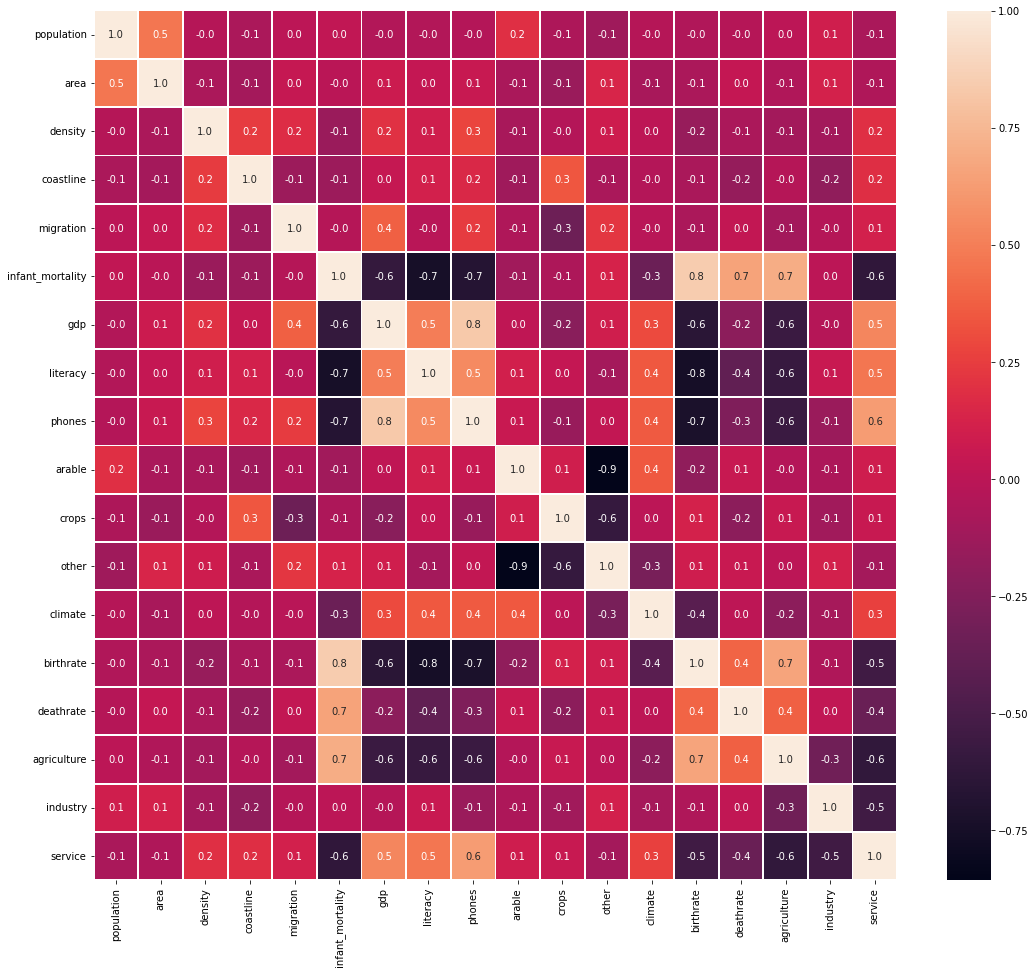

In [ ]:
f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

# drop country column

In [ ]:
df["country"].unique()

array(['Afghanistan ', 'Albania ', 'Algeria ', 'American Samoa ',
       'Andorra ', 'Angola ', 'Anguilla ', 'Antigua & Barbuda ',
       'Argentina ', 'Armenia ', 'Aruba ', 'Australia ', 'Austria ',
       'Azerbaijan ', 'Bahamas, The ', 'Bahrain ', 'Bangladesh ',
       'Barbados ', 'Belarus ', 'Belgium ', 'Belize ', 'Benin ',
       'Bermuda ', 'Bhutan ', 'Bolivia ', 'Bosnia & Herzegovina ',
       'Botswana ', 'Brazil ', 'British Virgin Is. ', 'Brunei ',
       'Bulgaria ', 'Burkina Faso ', 'Burma ', 'Burundi ', 'Cambodia ',
       'Cameroon ', 'Canada ', 'Cape Verde ', 'Cayman Islands ',
       'Central African Rep. ', 'Chad ', 'Chile ', 'China ', 'Colombia ',
       'Comoros ', 'Congo, Dem. Rep. ', 'Congo, Repub. of the ',
       'Cook Islands ', 'Costa Rica ', "Cote d'Ivoire ", 'Croatia ',
       'Cuba ', 'Cyprus ', 'Czech Republic ', 'Denmark ', 'Djibouti ',
       'Dominica ', 'Dominican Republic ', 'East Timor ', 'Ecuador ',
       'Egypt ', 'El Salvador ', 'Equatorial Guinea

In [ ]:
df=df.drop(['country'], axis=1)

In [ ]:
df

,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,OCEANIA,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,WESTERN EUROPE,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NEAR EAST,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,NORTHERN AFRICA,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,NEAR EAST,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [ ]:
df.head()

,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283
4,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283


In [ ]:
from sklearn import preprocessing

In [ ]:
df["region"].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df["region"])


In [ ]:
integer_encoded

array([ 0,  3,  6,  8, 10,  9,  4,  4,  4,  2,  4,  8, 10,  2,  4,  5,  0,
        4,  2, 10,  4,  9,  7,  0,  4,  3,  9,  4,  4,  0,  3,  9,  0,  9,
        0,  9,  7,  9,  4,  9,  9,  4,  0,  4,  9,  9,  9,  8,  4,  9,  3,
        4,  5,  3, 10,  9,  4,  4,  0,  4,  6,  4,  9,  9,  1,  9, 10,  8,
       10, 10,  4,  8,  9,  9,  5,  2, 10,  9, 10, 10,  7,  4,  4,  8,  4,
       10,  9,  9,  4,  4,  4,  0,  3, 10,  0,  0,  0,  5, 10, 10,  5, 10,
        4,  0, 10,  5,  2,  9,  8,  0,  0,  5,  2,  0,  1,  5,  9,  9,  6,
       10,  1, 10,  0,  3,  9,  9,  0,  0,  9, 10,  8,  4,  9,  9,  9,  4,
        8,  2, 10,  0,  4,  6,  9,  9,  8,  0, 10,  4,  8,  8,  4,  9,  9,
        8, 10,  5,  0,  8,  4,  8,  4,  4,  0,  3, 10,  4,  5,  9,  3,  2,
        9,  9,  4,  4,  7,  4,  8, 10,  9,  5,  9,  3,  9,  9,  0,  3,  3,
        8,  9,  9, 10,  0,  9,  4,  9, 10, 10,  5,  0,  2,  9,  0,  9,  8,
        4,  6,  5,  2,  4,  8,  9,  2,  5, 10,  7,  4,  2,  8,  4,  0,  4,
        8,  5,  6,  5,  9

In [ ]:
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

In [ ]:
oneHot_encoder = OneHotEncoder()
oneHot_encoder_new=oneHot_encoder.fit_transform(integer_encoded)

In [ ]:
print(oneHot_encoder_new.toarray())

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
enc_data=pd.DataFrame(oneHot_encoder.fit_transform(integer_encoded).toarray())

In [ ]:
enc_data

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
224,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df

,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,OCEANIA,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,WESTERN EUROPE,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NEAR EAST,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,NORTHERN AFRICA,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,NEAR EAST,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


In [ ]:
df=df.join(enc_data)

In [ ]:
df

,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,...,1,2,3,4,5,6,7,8,9,10
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,OCEANIA,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,WESTERN EUROPE,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NEAR EAST,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
223,NORTHERN AFRICA,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
224,NEAR EAST,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df=df.drop(["region"], axis=1)

In [ ]:
df

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,...,1,2,3,4,5,6,7,8,9,10
0,31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
223,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
224,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
225,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
scaler = preprocessing.StandardScaler()



In [ ]:
df_scalad=pd.DataFrame(scaler.fit_transform(df))

In [ ]:
df_scalad.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.019695,0.027583,-0.199844,-0.293443,4.750696,3.636688,-0.898554,-2.481004,-1.032796,-0.128695,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201,-0.398754,-0.518735,0.193960,-0.731200,0.562986,...,-0.115728,-0.23625,4.232808,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
2,0.035618,0.998421,-0.220490,-0.292889,-0.088346,-0.128489,-0.368806,-0.680038,-0.700597,-0.816517,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,6.069047,-0.150075,-0.319283,-0.538305,-0.375105
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281495,-0.747988,-0.168902,0.750140,0.103956,-0.293124,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,3.132016,-0.538305,-0.375105
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354081,-0.896805,0.930574,0.909049,1.158212,-0.893713,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,2.665923


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

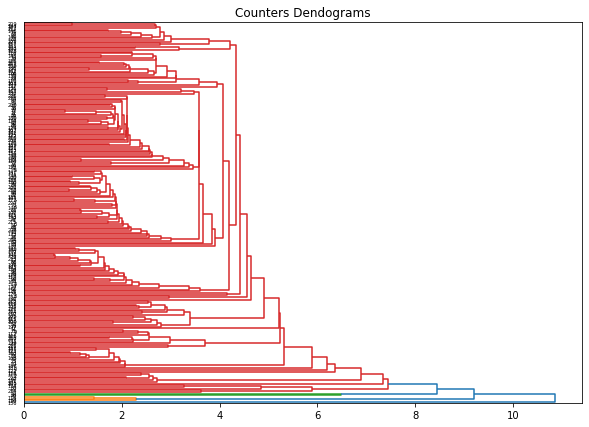

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_scalad , method='single' ,metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

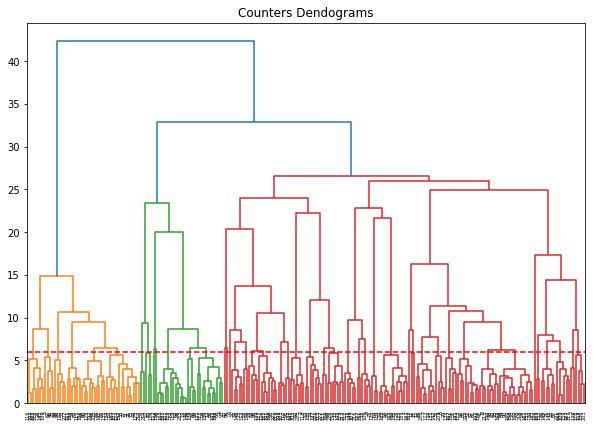

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_scalad , method='ward' ,metric='euclidean'))
plt.axhline(y=6, color='r', linestyle='--') #fill y with your dataframe
                                                

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [ ]:
df_scalad.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.019695,0.027583,-0.199844,-0.293443,4.750696,3.636688,-0.898554,-2.481004,-1.032796,-0.128695,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201,-0.398754,-0.518735,0.193960,-0.731200,0.562986,...,-0.115728,-0.23625,4.232808,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,-0.375105
2,0.035618,0.998421,-0.220490,-0.292889,-0.088346,-0.128489,-0.368806,-0.680038,-0.700597,-0.816517,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,6.069047,-0.150075,-0.319283,-0.538305,-0.375105
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281495,-0.747988,-0.168902,0.750140,0.103956,-0.293124,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,3.132016,-0.538305,-0.375105
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354081,-0.896805,0.930574,0.909049,1.158212,-0.893713,...,-0.115728,-0.23625,-0.236250,-0.497245,-0.275371,-0.164771,-0.150075,-0.319283,-0.538305,2.665923


For n_clusters = 2 The average silhouette_score is : 0.14055088085310619
For n_clusters = 3 The average silhouette_score is : 0.14055088085310619
For n_clusters = 4 The average silhouette_score is : 0.14055088085310619
For n_clusters = 5 The average silhouette_score is : 0.14055088085310619
For n_clusters = 6 The average silhouette_score is : 0.14055088085310619
For n_clusters = 7 The average silhouette_score is : 0.14055088085310619
For n_clusters = 8 The average silhouette_score is : 0.14055088085310619
For n_clusters = 9 The average silhouette_score is : 0.14055088085310619
For n_clusters = 10 The average silhouette_score is : 0.14055088085310619


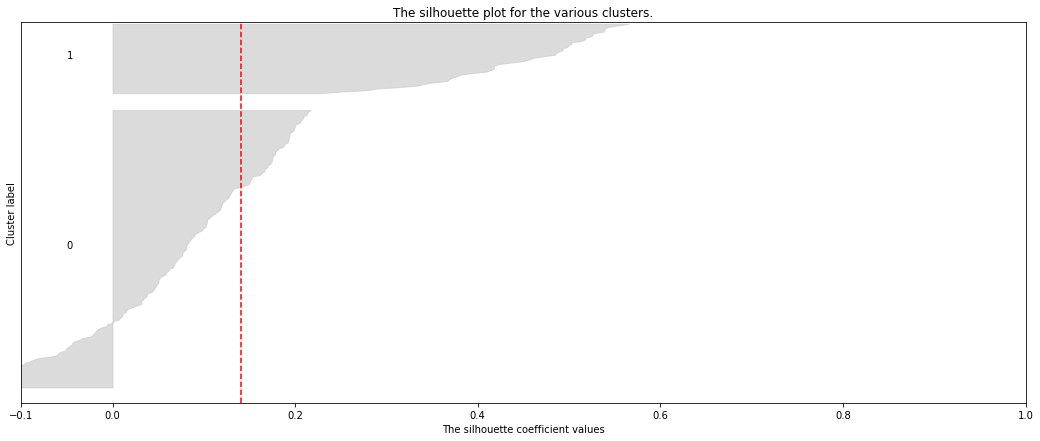

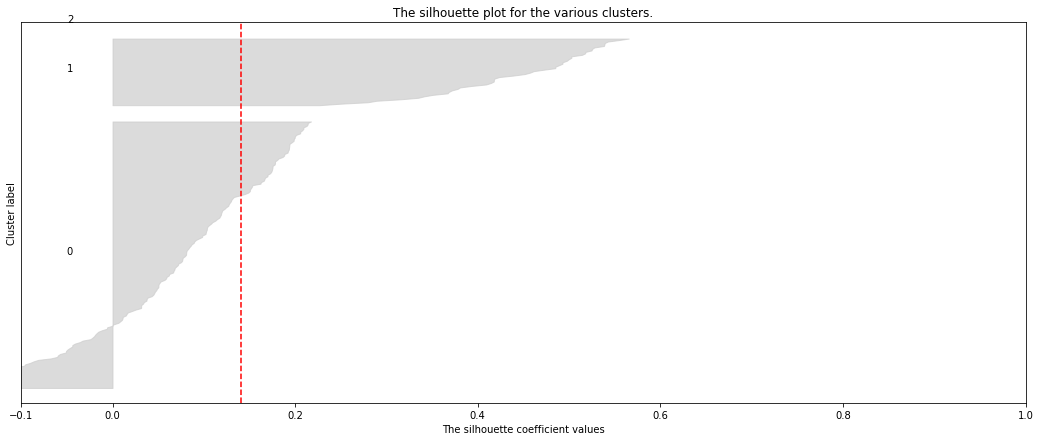

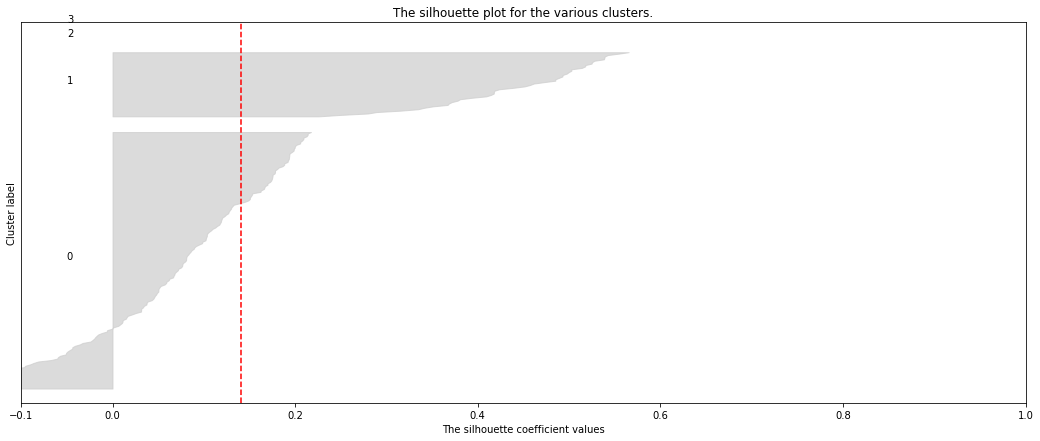

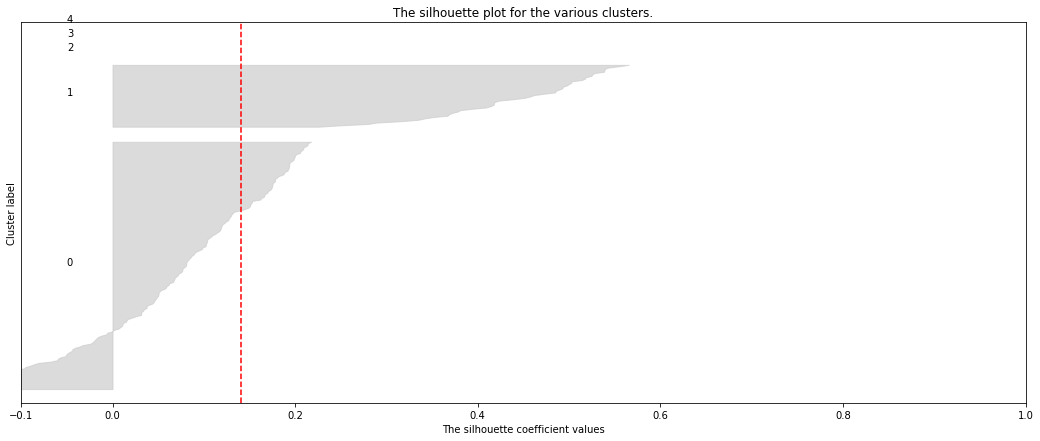

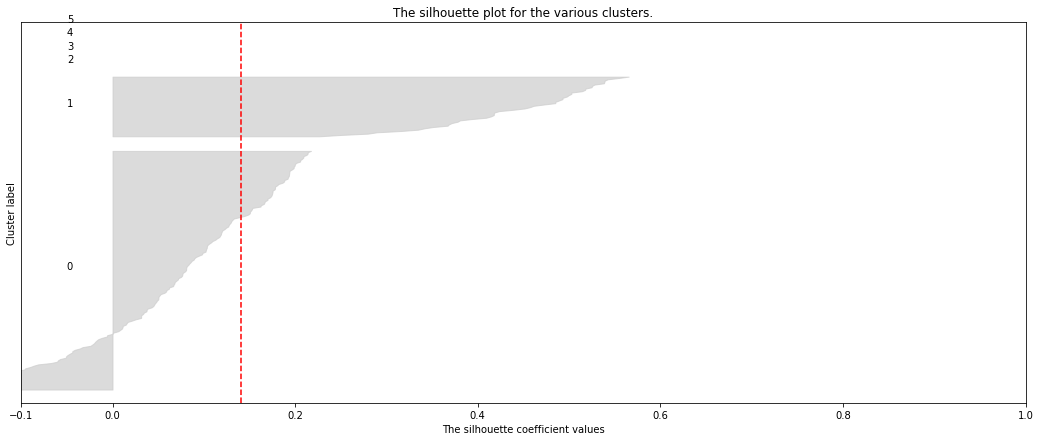

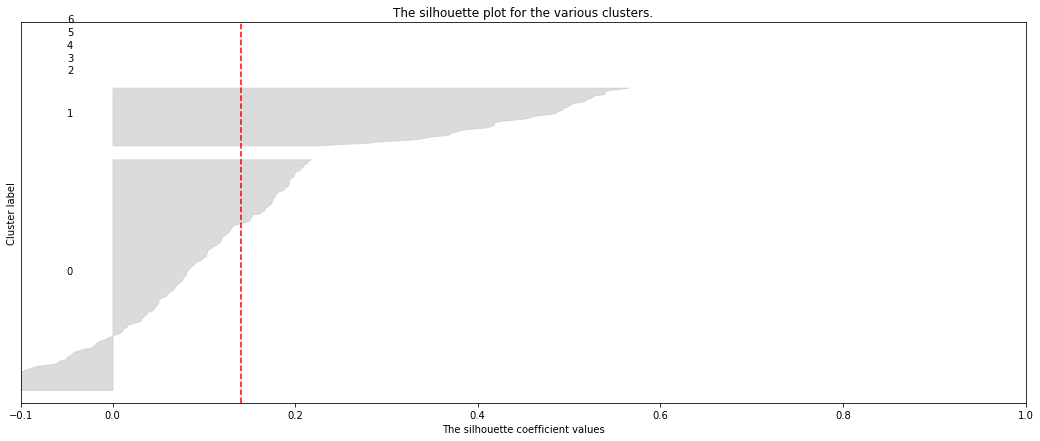

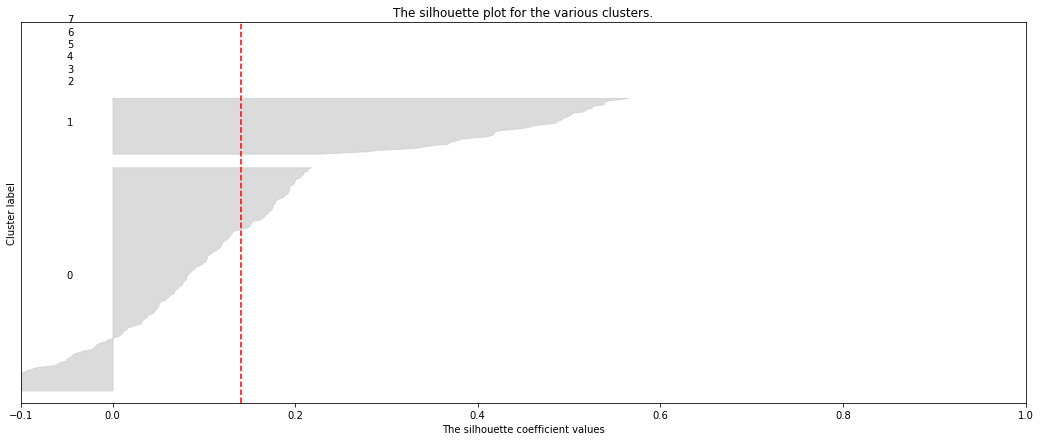

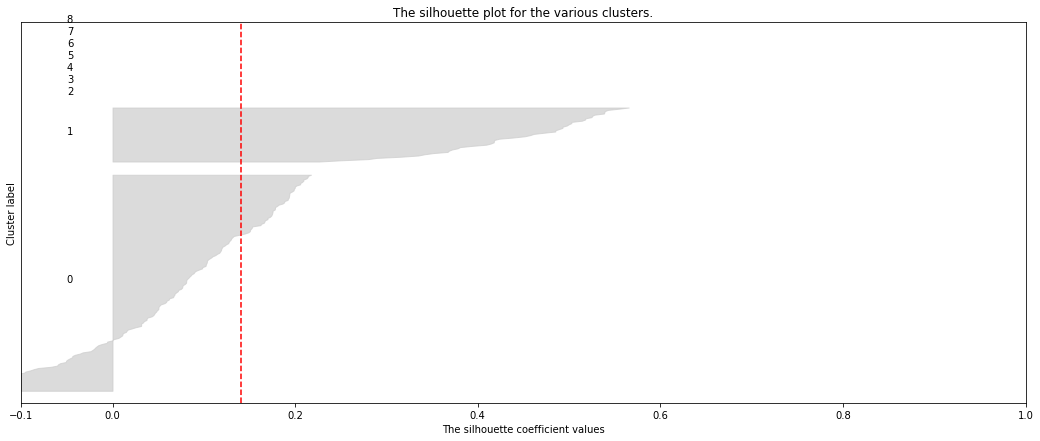

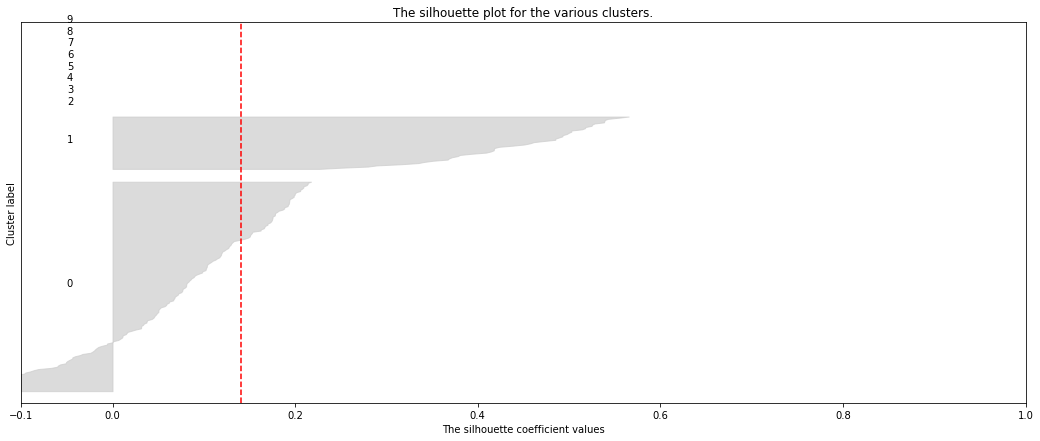

In [ ]:
list_cluster=[]
for i in range(2,11):

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scalad) + (i) * 10])

    cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
    cluster_label=cluster.fit_predict(df_scalad)


    silhouette_avg = silhouette_score(df_scalad, cluster_label)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df_scalad, cluster_label)
    y_lower=10
    for j in range(i):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values =\
            sample_silhouette_values[cluster_label == j]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) /i)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

# PCA

[6.20425333 2.70097285]


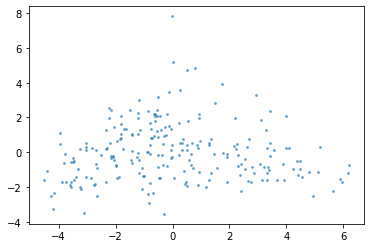

In [ ]:
from sklearn.decomposition import PCA
#PCA with two principal components
PCA_2d = PCA(n_components=2).fit(df_scalad)
#PCA_2d.head()
print(PCA_2d.explained_variance_)
PCA_2d = PCA(n_components=2).fit_transform(df_scalad)
plt.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

For n_clusters = 10 The average silhouette_score is : 0.3986309318307087
For n_clusters = 10 The average silhouette_score is : 0.3986309318307087
For n_clusters = 10 The average silhouette_score is : 0.3986309318307087
For n_clusters = 10 The average silhouette_score is : 0.3986309318307087
For n_clusters = 10 The average silhouette_score is : 0.3986309318307087
For n_clusters = 10 The average silhouette_score is : 0.3986309318307087
For n_clusters = 10 The average silhouette_score is : 0.3986309318307087
For n_clusters = 10 The average silhouette_score is : 0.3986309318307087
For n_clusters = 10 The average silhouette_score is : 0.3986309318307087


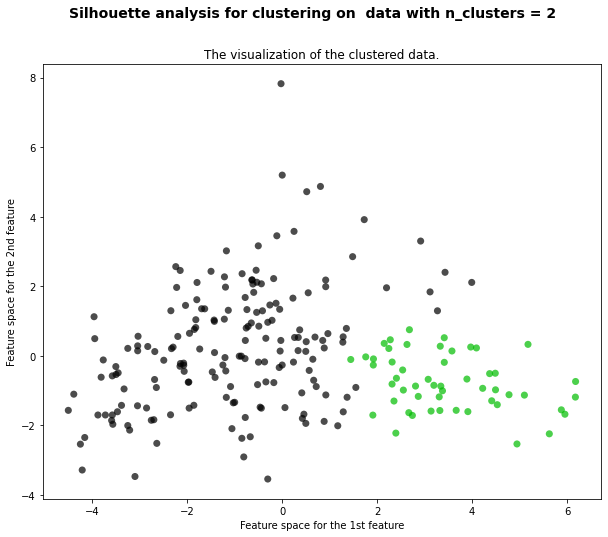

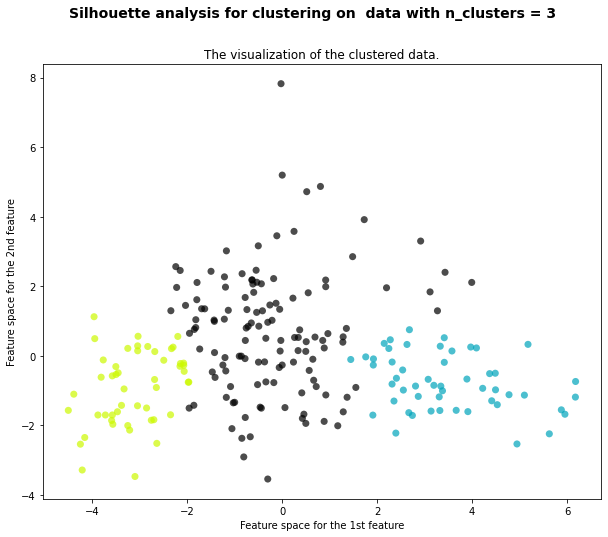

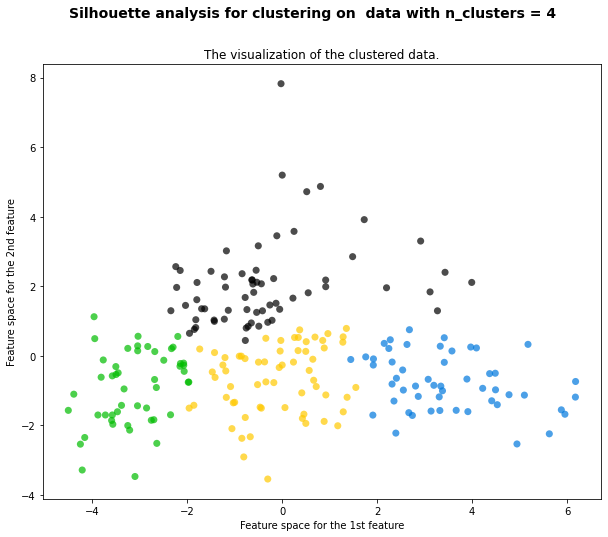

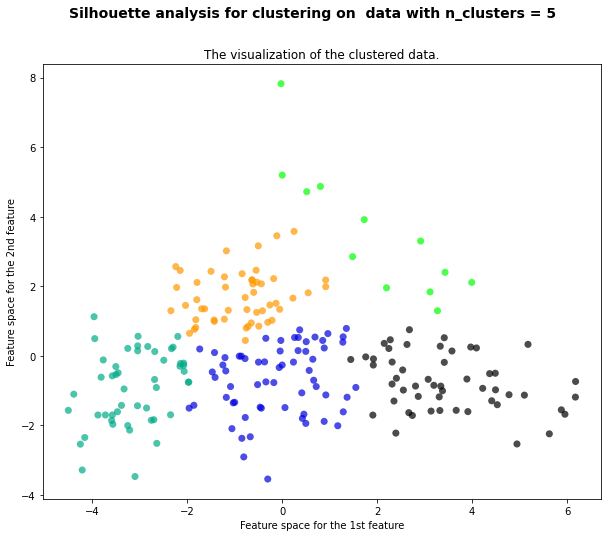

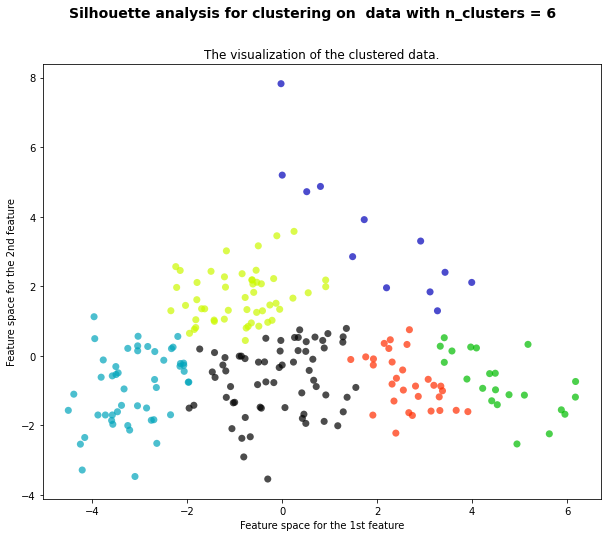

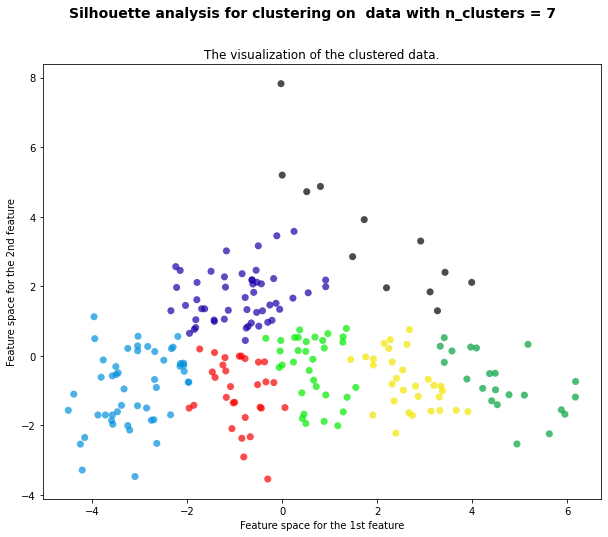

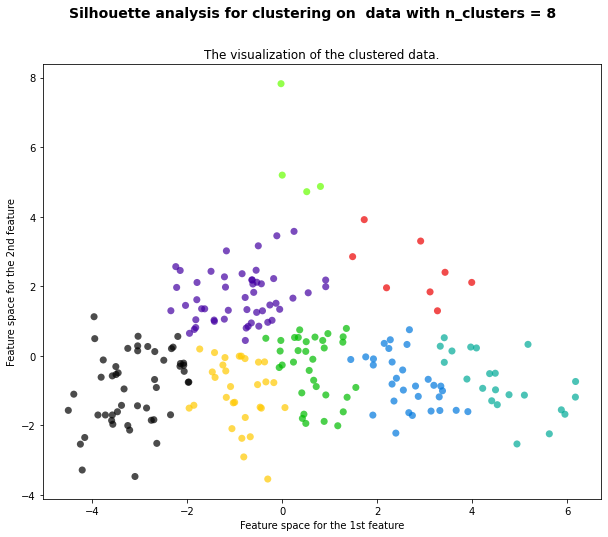

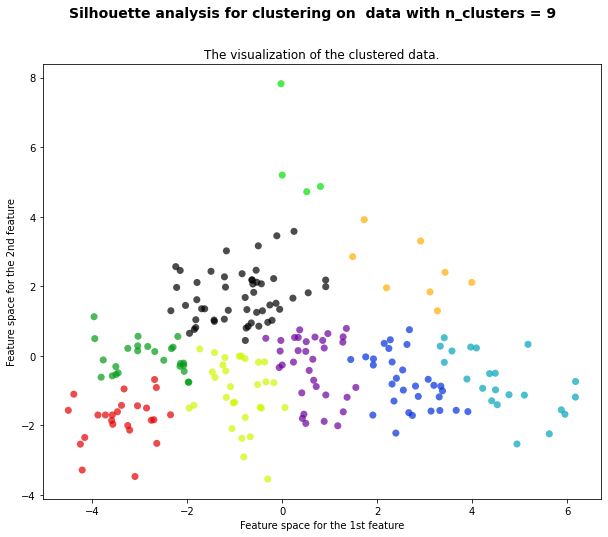

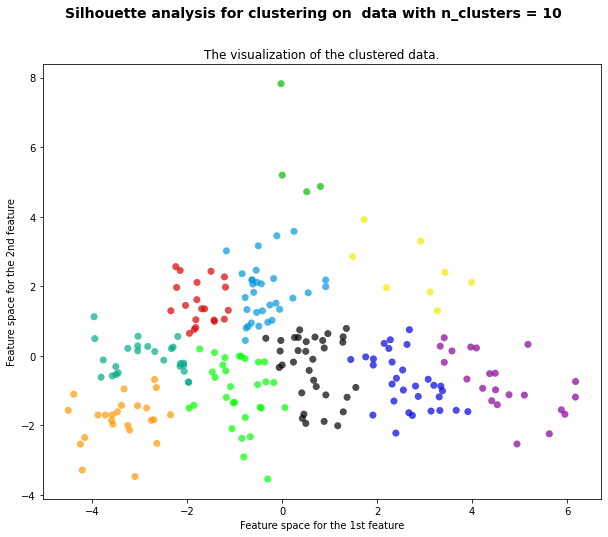

In [ ]:
for n_clusters in range(2,11):
    fig,ax2 = plt.subplots(1, 1)
    fig.set_size_inches(10, 8)
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(PCA_2d)
    silhouette_avg = silhouette_score(PCA_2d, cluster_label)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

      

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

plt.show()

[6.20425333 2.70097285 2.34095615 2.10230422 1.69033753 1.53565949
 1.37709917 1.22208572 1.08196745 1.05088203]


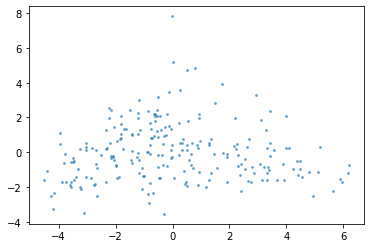

In [ ]:
#PCA with two principal components
PCA_2d = PCA(n_components=10).fit(df_scalad)
#PCA_2d.head()
print(PCA_2d.explained_variance_)
PCA_2d = PCA(n_components=10).fit_transform(df_scalad)
plt.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

For n_clusters = 10 The average silhouette_score is : 0.20158683062654895
For n_clusters = 10 The average silhouette_score is : 0.20158683062654895
For n_clusters = 10 The average silhouette_score is : 0.20158683062654895
For n_clusters = 10 The average silhouette_score is : 0.20158683062654895
For n_clusters = 10 The average silhouette_score is : 0.20158683062654895
For n_clusters = 10 The average silhouette_score is : 0.20158683062654895
For n_clusters = 10 The average silhouette_score is : 0.20158683062654895
For n_clusters = 10 The average silhouette_score is : 0.20158683062654895
For n_clusters = 10 The average silhouette_score is : 0.20158683062654895


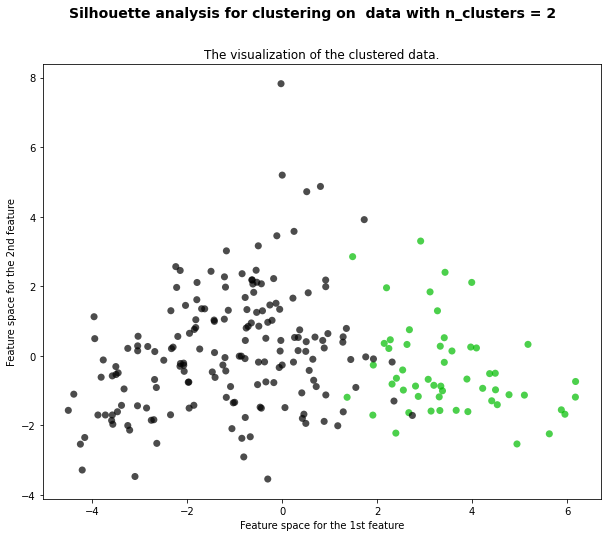

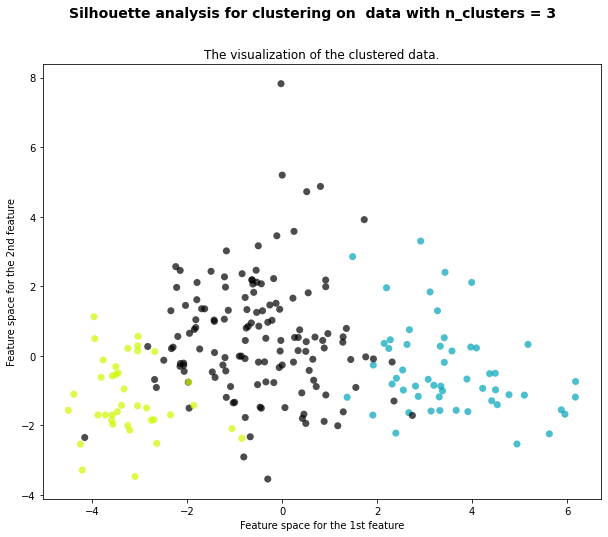

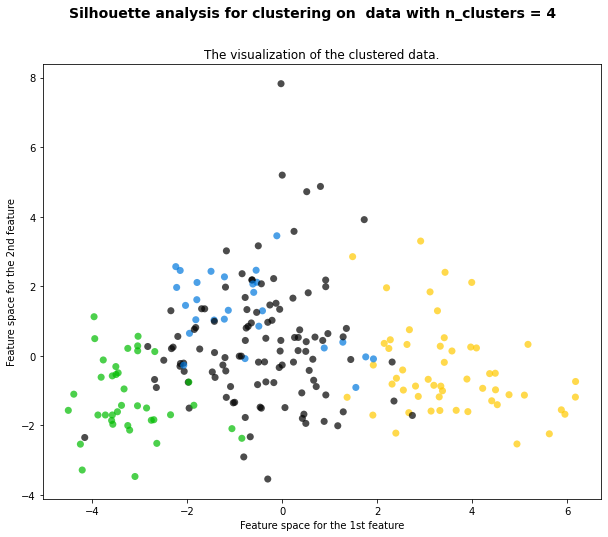

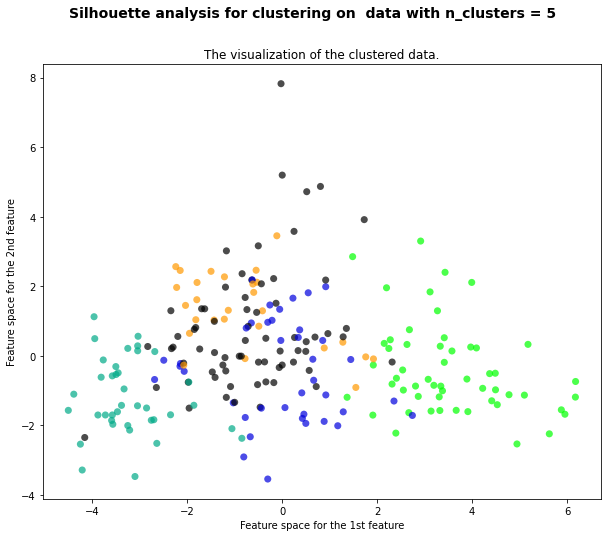

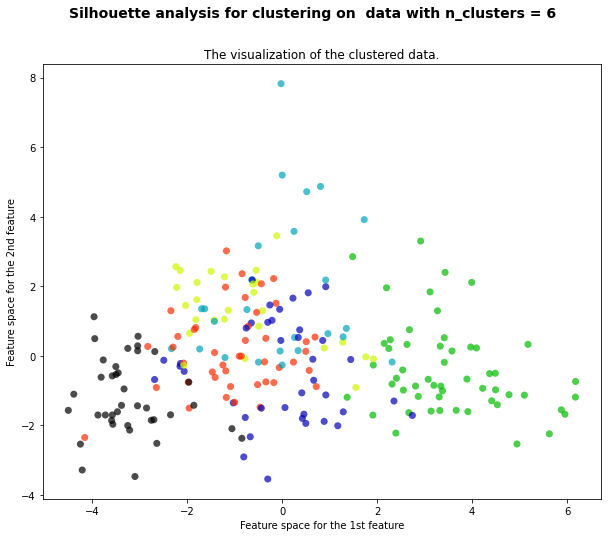

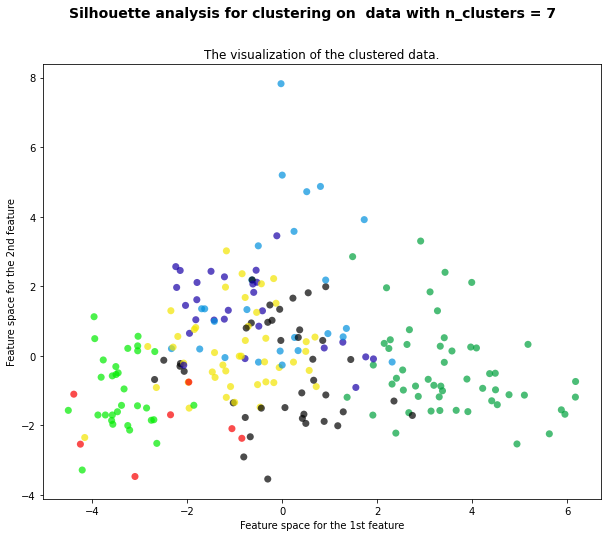

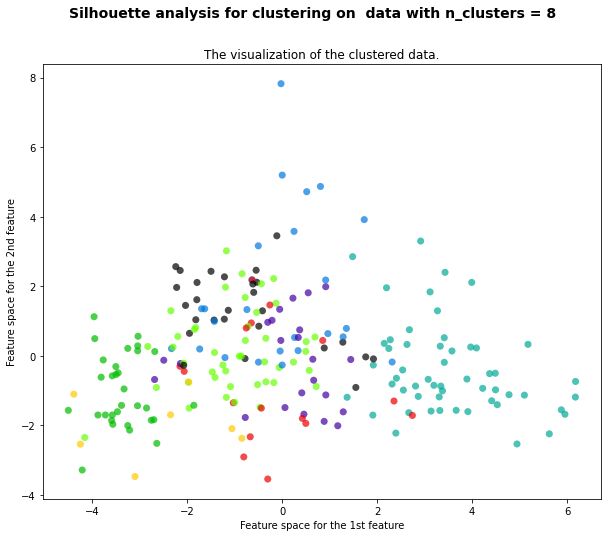

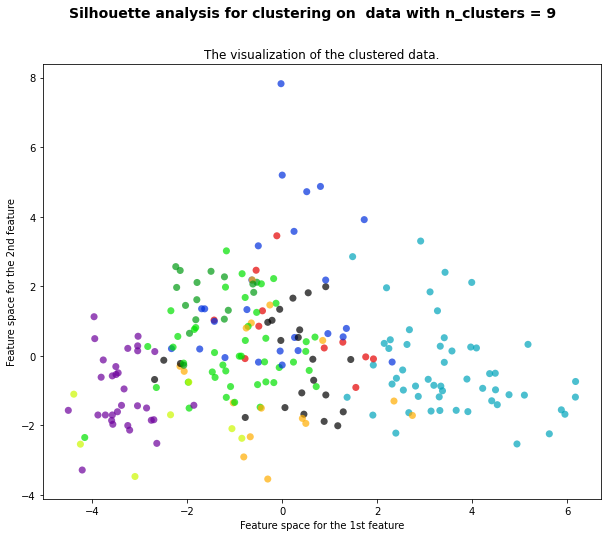

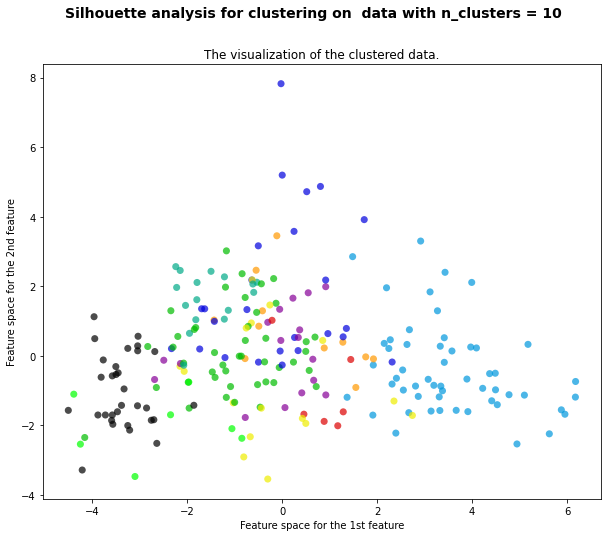

In [ ]:
for n_clusters in range(2,11):
    fig,ax2 = plt.subplots(1, 1)
    fig.set_size_inches(10, 8)
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(PCA_2d)
    silhouette_avg = silhouette_score(PCA_2d, cluster_label)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

      

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

plt.show()